This scripts calculate semantic and temporal scores for the whle FR1 dataset.
It should work for catfr too (although a category score may be more relevant than the semantic score used in this script)

In [6]:
%matplotlib inline
import cmlreaders as cml
import pybeh_pd as pb
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
all_fr1_events = cml.CMLReader.load_events(experiments=["FR1"])

In [3]:
events = all_fr1_events.query('type == ["WORD", "REC_WORD"]')
events.rename(columns={'item_name': 'item'}, inplace=True)
events = events[events['list'] > 0]
word_evs = events.query('type == "WORD"')
rec_evs = events.query('type == "REC_WORD"')

#removing subjects who were presented with the same word multiple times (probably repeated data)
n_word_pres = word_evs.groupby(['subject', 'session', 'list', 'item_num']).size().to_frame(name='n').reset_index()
bad_lists = n_word_pres.query('n > 2')
bad_lists[['subject', 'session', 'list']].drop_duplicates()
bad_subs = bad_lists.subject.unique().tolist()
bad_subs = bad_subs + ["R1171M", "R1093J", "R1329T", "R1341T", "R1015J"] #"R1015J" had no recalls, other subjects unsure...
events.query('subject not in @bad_subs', inplace=True)

/home1/noaherz/.conda/envs/cml3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
events

,answer,eegfile,eegoffset,exp_version,experiment,intrusion,is_stim,iscorrect,item,item_num,...,recognized,rectime,rejected,serialpos,session,stim_list,stim_params,subject,test,type
26,-999,R1001P_FR1_0_12Oct14_1034,388959,1.02,FR1,-999,0,-999,HOUSE,130,...,NaN,-999,NaN,1,0,0,[],R1001P,"[0, 0, 0]",WORD
27,-999,R1001P_FR1_0_12Oct14_1034,390268,1.02,FR1,-999,0,-999,HAWK,120,...,NaN,-999,NaN,2,0,0,[],R1001P,"[0, 0, 0]",WORD
28,-999,R1001P_FR1_0_12Oct14_1034,391560,1.02,FR1,-999,0,-999,WAND,288,...,NaN,-999,NaN,3,0,0,[],R1001P,"[0, 0, 0]",WORD
29,-999,R1001P_FR1_0_12Oct14_1034,392785,1.02,FR1,-999,0,-999,GEESE,110,...,NaN,-999,NaN,4,0,0,[],R1001P,"[0, 0, 0]",WORD
30,-999,R1001P_FR1_0_12Oct14_1034,394019,1.02,FR1,-999,0,-999,STAR,247,...,NaN,-999,NaN,5,0,0,[],R1001P,"[0, 0, 0]",WORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,-999,R1573T_FR1_0_27Jul21_1625,1075713,1.05,FR1,-999,0,-999,POOL,192,...,-999.0,-999,-999.0,12,0,0,[],R1573T,"[0, 0, 0]",WORD
302,-999,R1573T_FR1_0_27Jul21_1625,1174759,1.05,FR1,-999,0,-999,CORD,62,...,-999.0,-999,-999.0,1,0,0,[],R1573T,"[0, 0, 0]",WORD
303,-999,R1573T_FR1_0_27Jul21_1625,1177225,1.05,FR1,-999,0,-999,WAVE,289,...,-999.0,-999,-999.0,2,0,0,[],R1573T,"[0, 0, 0]",WORD
304,-999,R1573T_FR1_0_27Jul21_1625,1179843,1.05,FR1,-999,0,-999,JUICE,138,...,-999.0,-999,-999.0,3,0,0,[],R1573T,"[0, 0, 0]",WORD


In [4]:
pb_crp = events.groupby('subject').apply(pb.pd_crp, 
                                itemno_column='item_num').reset_index()

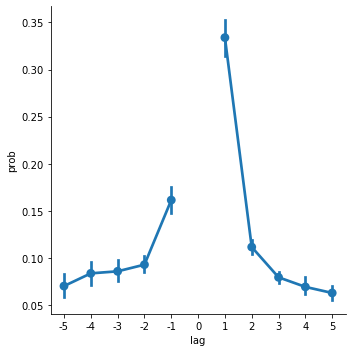

In [5]:
g = sns.catplot(x='lag', y='prob', kind='point', 
                  data=pb_crp.query('lag <= 5 and lag >= -5')
           )

I can add one more column to the data frame (e.g. BDI) 
and then add 'hue' to the above plot to seperate the results 
for the low and high depression groups

In [15]:
pb_temp_fact = events.groupby("subject").apply(pb.pd_temp_fact,
                                                   itemno_column='item_num', 
                                                   list_index=['subject', 'session', 'list'], 
                                                   pres_type="WORD", rec_type="REC_WORD", type_column='type'#, ret_counts=False,
                                                   ).to_frame(name='temp_fact').reset_index()

pb_temp_fact

,subject,temp_fact
0,R1001P,0.625303
1,R1002P,0.602389
2,R1003P,0.697490
3,R1006P,0.674832
4,R1010J,0.603109
...,...,...
269,R1565T,0.926068
270,R1569T,0.758442
271,R1571T,0.741228
272,R1572T,0.395809


In [21]:
# replace item nums so they are consistent across subjects
item_col = 'item'
item_num_col = 'item_num'
item_num_df = events.query('type == "WORD"').drop_duplicates(subset=item_col, ignore_index=True
                                    )[item_col].reset_index().rename(columns={'index': item_num_col})
events_new = events.merge(item_num_df, on=item_col, suffixes=('', '_new'), 
                          how='left', sort=False)#.sort_values('mstime')
events_new.fillna({'item_num_new': -999}, inplace=True)

In [18]:
# import gensim.downloader
# word2vec_vectors = gensim.downloader.load('word2vec-google-news-300')
import gensim.models as models
word2vec_vectors = models.KeyedVectors.load_word2vec_format(
    '/home1/noaherz/word2vec/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [19]:
def word_similarity(df, col1, col2, keyed_vector=None):
    try:
        return keyed_vector.similarity(df[col1].lower(), df[col2].lower())
    except:
        return np.nan

In [22]:
# get all pairs of items
items = item_num_df.item.values
sem_sim_df = pd.MultiIndex.from_product([items, items], names=['item_1', 'item_2']).to_frame(index=False)

In [23]:
sem_sim_df

,item_1,item_2
0,HOUSE,HOUSE
1,HOUSE,HAWK
2,HOUSE,WAND
3,HOUSE,GEESE
4,HOUSE,STAR
...,...,...
563996,VIGA,PECHO
563997,VIGA,CAMELLO
563998,VIGA,INUNDACION
563999,VIGA,BEBE


In [24]:
# compute similarity of all pairs
sem_sim_df['similarity'] = sem_sim_df.apply(word_similarity, 
               axis=1, col1='item_1', 
               col2='item_2', 
               keyed_vector=word2vec_vectors)

In [26]:
sem_sim_df

,item_1,item_2,similarity
0,HOUSE,HOUSE,1.000000
1,HOUSE,HAWK,0.113100
2,HOUSE,WAND,0.093160
3,HOUSE,GEESE,0.057868
4,HOUSE,STAR,0.063717
...,...,...,...
563996,VIGA,PECHO,NaN
563997,VIGA,CAMELLO,NaN
563998,VIGA,INUNDACION,NaN
563999,VIGA,BEBE,NaN


In [25]:
sem_sim_num_df = sem_sim_df.merge(
    item_num_df, left_on='item_1', right_on='item').merge(
    item_num_df, left_on='item_2', right_on='item', suffixes=('_1', '_2')).drop(columns=['item_1', 'item_2'])

In [27]:
sem_sims = pd.pivot_table(sem_sim_num_df, index='item_num_1', columns='item_num_2', values='similarity', dropna=False)

In [28]:
pb_sem_crp = events_new.groupby('subject').apply(pb.pd_sem_crp, 
                                itemno_column='item_num_new', sem_sims=sem_sims).reset_index()

In [31]:
pb_sem_crp

,subject,level_1,prob,sem_bin_mean,sem_bin
0,R1001P,0,0.222222,-0.017548,0
1,R1001P,1,0.090909,0.025054,1
2,R1001P,2,0.200000,0.056349,2
3,R1001P,3,0.225806,0.070869,3
4,R1001P,4,0.060606,0.096825,4
...,...,...,...,...,...
2714,R1573T,5,0.333333,0.112906,5
2715,R1573T,6,0.285714,0.138221,6
2716,R1573T,7,0.125000,0.153078,7
2717,R1573T,8,0.000000,NaN,8


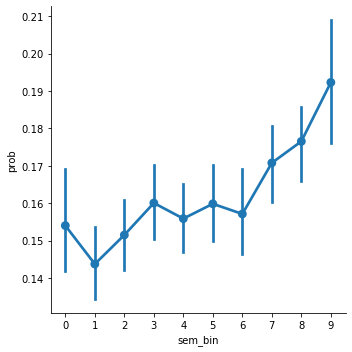

In [32]:
g = sns.catplot(x='sem_bin', y='prob', kind='point', 
                  data=pb_sem_crp
           )

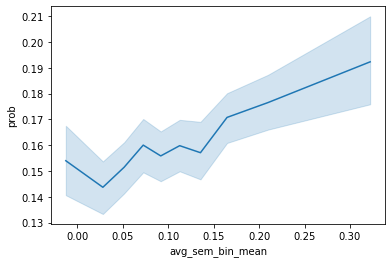

In [33]:
#using average bin value
pb_sem_crp['avg_sem_bin_mean'] = pb_sem_crp.groupby('sem_bin')['sem_bin_mean'].transform('mean')
g = sns.lineplot(x='avg_sem_bin_mean', y='prob', data=pb_sem_crp)

In [35]:
pb_sem_dist_fact = events_new.groupby("subject").apply(pb.pd_dist_fact,
                                                       rec_itemnos=None, 
                                                       itemno_column='item_num_new', 
                                                       list_index=['subject', 'session', 'list'], 
                                                       dist_mat=sem_sims, 
                                                       sim_columns=None, 
                                                       is_similarity=True, 
                                                       dist_columns=None,
                                                       skip_first_n=0,
                                                       pres_type="WORD", rec_type="REC_WORD", type_column='type', ret_counts=False,
                                                       ).to_frame('sem_fact').reset_index()

pb_sem_dist_fact

,subject,sem_fact
0,R1001P,0.423773
1,R1002P,0.463757
2,R1003P,0.484534
3,R1006P,0.519349
4,R1010J,0.521338
...,...,...
269,R1565T,0.464103
270,R1569T,0.472451
271,R1571T,0.638596
272,R1572T,0.525595
